# Compression Heat Map

In [1]:
import pandas as pd

In [4]:
lossy_df = pd.read_csv('output/cavs_mini_lossy.csv') #Id be skeptical about these results and also I am not using lossy anyway
#lossless_df = pd.read_csv('output/cavs_mini_lossless.csv')
lossless_df = pd.read_csv("/home/aniemcz/cavs/compressionStuff/output/cavs_mini_lossless_binary_plz_work.csv")

In [5]:
lossless_df

,Unnamed: 0,filename,compressor,cBW,dBW,CR,normalize_time,diff_time,comp_time,encoding_time,de_comp_time,total_time,thread,uncompressed_size_bytes,compressed_size_bytes,decompressed_size_bytes,compression_level
0,0,imgs/*.png,zstd,64.297277,1750.215245,19.248038,0.019705,1.116803e-06,29.507037,29.526745,1.084718,30.611464,1,1898489280,98632874,1898489280,9
1,1,imgs/*.png,blosclz,6168.687510,1339.033078,4.899132,0.020976,9.913194e-07,0.286783,0.307762,1.417806,1.725570,1,1898489280,387515456,1898489280,9
2,2,imgs/*.png,lz4,4972.268475,1382.470814,5.126104,0.021470,9.787710e-07,0.360343,0.381816,1.373258,1.755076,1,1898489280,370357144,1898489280,9
3,3,imgs/*.png,lz4hc,60.521676,964.207681,10.687575,0.021220,1.016416e-06,31.347527,31.368749,1.968963,33.337714,1,1898489280,177635185,1898489280,9
4,4,imgs/*.png,zlib,80.544284,620.399074,17.069554,0.021212,9.913194e-07,23.549537,23.570751,3.060110,26.630863,1,1898489280,111220787,1898489280,9


In [6]:
compressors_dict = {}

In [134]:
data = lossy_df[['compressor', 'CR', 'total_time']]

compressors = ['sz3', 'zfp']

for comp in compressors:
    comp_df = data[data['compressor'] == comp]
    mean_cr = comp_df['CR'].mean()
    total_time = comp_df['total_time'].sum()
    
    compressors_dict[comp] = {}
    compressors_dict[comp]["cr"] = mean_cr
    compressors_dict[comp]["total_time"] = total_time

    print(f"The mean CR for rows with compressor '{comp}' is: {mean_cr}")
    print(f"The time taken for rows with compressor '{comp}' is: {total_time} seconds")

The mean CR for rows with compressor 'sz3' is: 11.707897555232654
The time taken for rows with compressor 'sz3' is: 483.41125059127774 seconds
The mean CR for rows with compressor 'zfp' is: 0.6801096040820752
The time taken for rows with compressor 'zfp' is: 458.70604491233786 seconds


In [135]:
data = lossless_df[['compressor', 'CR', 'total_time', 'compressed_size_bytes', 'uncompressed_size_bytes']]

compressors = ['ZSTD','BLOSCLZ','LZ4','LZ4HC','ZLIB','Uncompressed']

for comp in compressors:
    if comp != 'Uncompressed':
        comp_df = data[data['compressor'] == comp.lower()]
        cr = comp_df['CR'].squeeze()
        total_time = comp_df['total_time'].squeeze()
        compressed_size_bytes = comp_df['compressed_size_bytes'].squeeze()
        uncompressed_size_bytes = comp_df['uncompressed_size_bytes'].squeeze()

        #.squeeze() makes it so it returns only the value of that cell and not also the label for that cell

        compressors_dict[comp] = {}
        compressors_dict[comp]["cr"] = cr
        compressors_dict[comp]["total_time"] = total_time
        compressors_dict[comp]["compressed_size_bytes"] = compressed_size_bytes
        compressors_dict[comp]["uncompressed_size_bytes"] = uncompressed_size_bytes

        print(f"num images is: {comp_df.shape}")
        print(f"The CR for rows with compressor '{comp}' is: {cr}")
        print(f"The time taken for rows with compressor '{comp}' is: {total_time} seconds")
        print(f"The size it compressed it to with compressor '{comp}' is: {compressed_size_bytes} bytes")
        print(f"Uncompressed size is is: {uncompressed_size_bytes} bytes")
        print("\n")
    else:
        pass

The CR for rows with compressor 'ZSTD' is: 19.24803772827303
The time taken for rows with compressor 'ZSTD' is: 30.61146443768552 seconds
The size it compressed it to with compressor 'ZSTD' is: 98632874 bytes
Uncompressed size is is: 1898489280 bytes


The CR for rows with compressor 'BLOSCLZ' is: 4.89913176521145
The time taken for rows with compressor 'BLOSCLZ' is: 1.725570415195666 seconds
The size it compressed it to with compressor 'BLOSCLZ' is: 387515456 bytes
Uncompressed size is is: 1898489280 bytes


The CR for rows with compressor 'LZ4' is: 5.126104115329284
The time taken for rows with compressor 'LZ4' is: 1.7550755174536454 seconds
The size it compressed it to with compressor 'LZ4' is: 370357144 bytes
Uncompressed size is is: 1898489280 bytes


The CR for rows with compressor 'LZ4HC' is: 10.687574536542408
The time taken for rows with compressor 'LZ4HC' is: 33.33771434583162 seconds
The size it compressed it to with compressor 'LZ4HC' is: 177635185 bytes
Uncompressed size i

In [136]:
'''
import os
import tqdm

def get_size(start_path = '/scratch/aniemcz/CAT2/CAT/mixed/Train/imgs/'):
    total_size = 0
    for dirpath, dirnames, filenames in os.walk(start_path):
        for f in filenames:
            fp = os.path.join(dirpath, f)
            # skip if it is symbolic link
            if not os.path.islink(fp):
                total_size += os.path.getsize(fp)

    return total_size

sizeB = get_size(start_path='/scratch/aniemcz/CAT2/CAT/mixed/Train/imgs/')
print(sizeB, 'bytes')
sizeKb = sizeB/1000
#print(sizeKb, "Kilobytes KB")
sizeMb = sizeKb/1000
#print(sizeMb, "Megabytes MB")
sizeGb = sizeMb/1000
#print(sizeGb, "Gigabytes GB")
'''

'\nimport os\nimport tqdm\n\ndef get_size(start_path = \'/scratch/aniemcz/CAT2/CAT/mixed/Train/imgs/\'):\n    total_size = 0\n    for dirpath, dirnames, filenames in os.walk(start_path):\n        for f in filenames:\n            fp = os.path.join(dirpath, f)\n            # skip if it is symbolic link\n            if not os.path.islink(fp):\n                total_size += os.path.getsize(fp)\n\n    return total_size\n\nsizeB = get_size(start_path=\'/scratch/aniemcz/CAT2/CAT/mixed/Train/imgs/\')\nprint(sizeB, \'bytes\')\nsizeKb = sizeB/1000\n#print(sizeKb, "Kilobytes KB")\nsizeMb = sizeKb/1000\n#print(sizeMb, "Megabytes MB")\nsizeGb = sizeMb/1000\n#print(sizeGb, "Gigabytes GB")\n'

In [137]:
1898489280 / 1290635868

1.470972043371105

In [147]:
#in MiB per second
bandwidths = [1000, 100, 50, 10, 5,] #lets say this is in Mb per second

compressors = ['ZSTD','BLOSCLZ','LZ4','LZ4HC','ZLIB', 'Uncompressed']

compressor_labels = []

for comp in compressors:
    if comp != 'Uncompressed':
        label = '{} CR:{:0.2f}'.format(comp, compressors_dict[comp]["cr"])
    else:
        label = "Uncompressed"
    compressor_labels.append(label)
    
compressor_labels

['ZSTD CR:19.25',
 'BLOSCLZ CR:4.90',
 'LZ4 CR:5.13',
 'LZ4HC CR:10.69',
 'ZLIB CR:17.07',
 'Uncompressed']

In [148]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data (replace with your actual data)
#compression_ratios = np.linspace(1, 10, 20)  # From 1:1 to 10:1
#compressors = ['zstd','blosclz','lz4','lz4hc','zlib'] #all are lossless except for zfp and sz3 which are lossy (for now lets only include lossless)

# Create a 2D array for the heat map values
# This example uses random data - replace with your actual measurements
#These are the times it takes for that configuration to theoretically send
data = np.random.rand(len(bandwidths), len(compressor_labels))

#time_to_compress + compressed_dataset_size / (transfer bandwidth) + time_to_decompress

#compressed_ds_size = ogsize / cr
#comp_time_avg + (compress_ds_size / bandwidths[i]) + decomp_time_avg OR (compress_ds_size / bandwidths[i]) + total_time_to_compress_and_decompress

#although I got a mismatch in uncompressed_ds_size for libpressio and for doing os.path.getsize, for consistency libpressio's numbers will be used

#converted to megabytes
uncompressed_ds_size = compressors_dict[compressors[0]]["uncompressed_size_bytes"] / 1000000

print(uncompressed_ds_size)

for idx_i, comp in enumerate(compressors):
    #compressed_ds_size = original_ds_size / compressors_dict[comp]["cr"] #og_ds_size / cr
    if comp != 'Uncompressed':
        #divide by 1000000 to convert it from bytes to megabytes (mb is 1e6 bytes)
        compressed_ds_size = compressors_dict[comp]["compressed_size_bytes"] / 1000000
    
    for idx_j, bw in enumerate(bandwidths):
        if comp != 'Uncompressed':
            #for compressors
            data[idx_j][idx_i] = (compressed_ds_size / bw) + compressors_dict[comp]["total_time"]
        else:
            #for without a compressor
            data[idx_j][idx_i] = (uncompressed_ds_size / bw)

1898.48928


In [149]:
compressors_dict

{'sz3': {'cr': 11.707897555232654, 'total_time': 483.41125059127774},
 'zfp': {'cr': 0.6801096040820752, 'total_time': 458.70604491233786},
 'ZSTD': {'cr': 19.24803772827303,
  'total_time': 30.61146443768552,
  'compressed_size_bytes': 98632874,
  'uncompressed_size_bytes': 1898489280},
 'BLOSCLZ': {'cr': 4.89913176521145,
  'total_time': 1.725570415195666,
  'compressed_size_bytes': 387515456,
  'uncompressed_size_bytes': 1898489280},
 'LZ4': {'cr': 5.126104115329284,
  'total_time': 1.7550755174536454,
  'compressed_size_bytes': 370357144,
  'uncompressed_size_bytes': 1898489280},
 'LZ4HC': {'cr': 10.687574536542408,
  'total_time': 33.33771434583162,
  'compressed_size_bytes': 177635185,
  'uncompressed_size_bytes': 1898489280},
 'ZLIB': {'cr': 17.069554452981887,
  'total_time': 26.63086297637538,
  'compressed_size_bytes': 111220787,
  'uncompressed_size_bytes': 1898489280}}

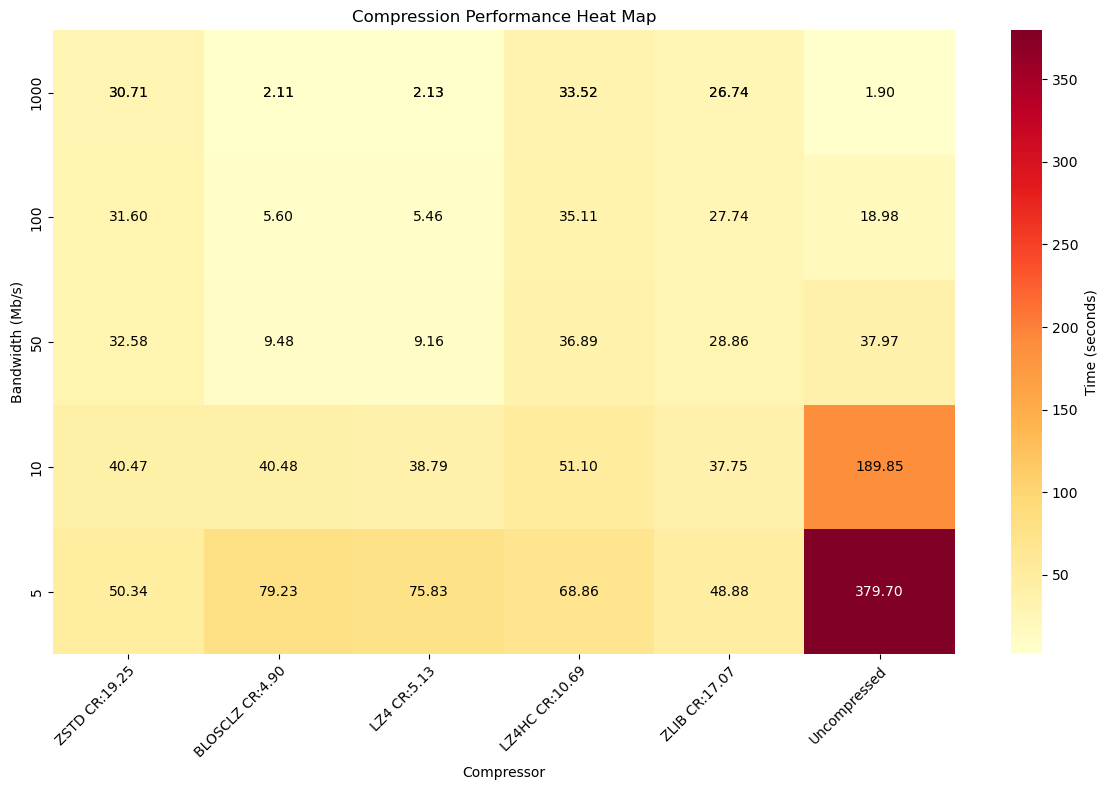

In [153]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create the heat map
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(data, xticklabels=compressor_labels, yticklabels=bandwidths,
            cmap='YlOrRd',fmt='.2f', annot=True, ax=ax, cbar=True, cbar_kws={'label': 'Time (seconds)'})

# Function to determine text color based on background
def text_color_for_background(value):
    threshold = (data.max() - data.min()) / 2.0 + data.min()
    return 'white' if value > threshold else 'black'

# Manually add text with conditional coloring
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        value = data[i, j]
        text_color = text_color_for_background(value)
        ax.text(j + 0.5, i + 0.5, f'{value:.2f}',
                ha="center", va="center", color=text_color)

plt.xlabel('Compressor')
plt.ylabel('Bandwidth (Mb/s)')
plt.title('Compression Performance Heat Map')

# Rotate and align the tick labels so they look better
plt.setp(ax.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')

# Adjust layout
plt.tight_layout()

# Save the figure as PNG
plt.savefig('compression_heatmap_final.jpg', dpi=500, bbox_inches='tight')

# If you still want to display the plot, keep this line
plt.show()

In [ ]:
#font Times New Roman
#make text bigger

In [170]:
# Set the global font to Times New Roman
import matplotlib.pyplot as plt
#plt.rcParams["font.family"] = "Times New Roman"
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Nimbus Roman']

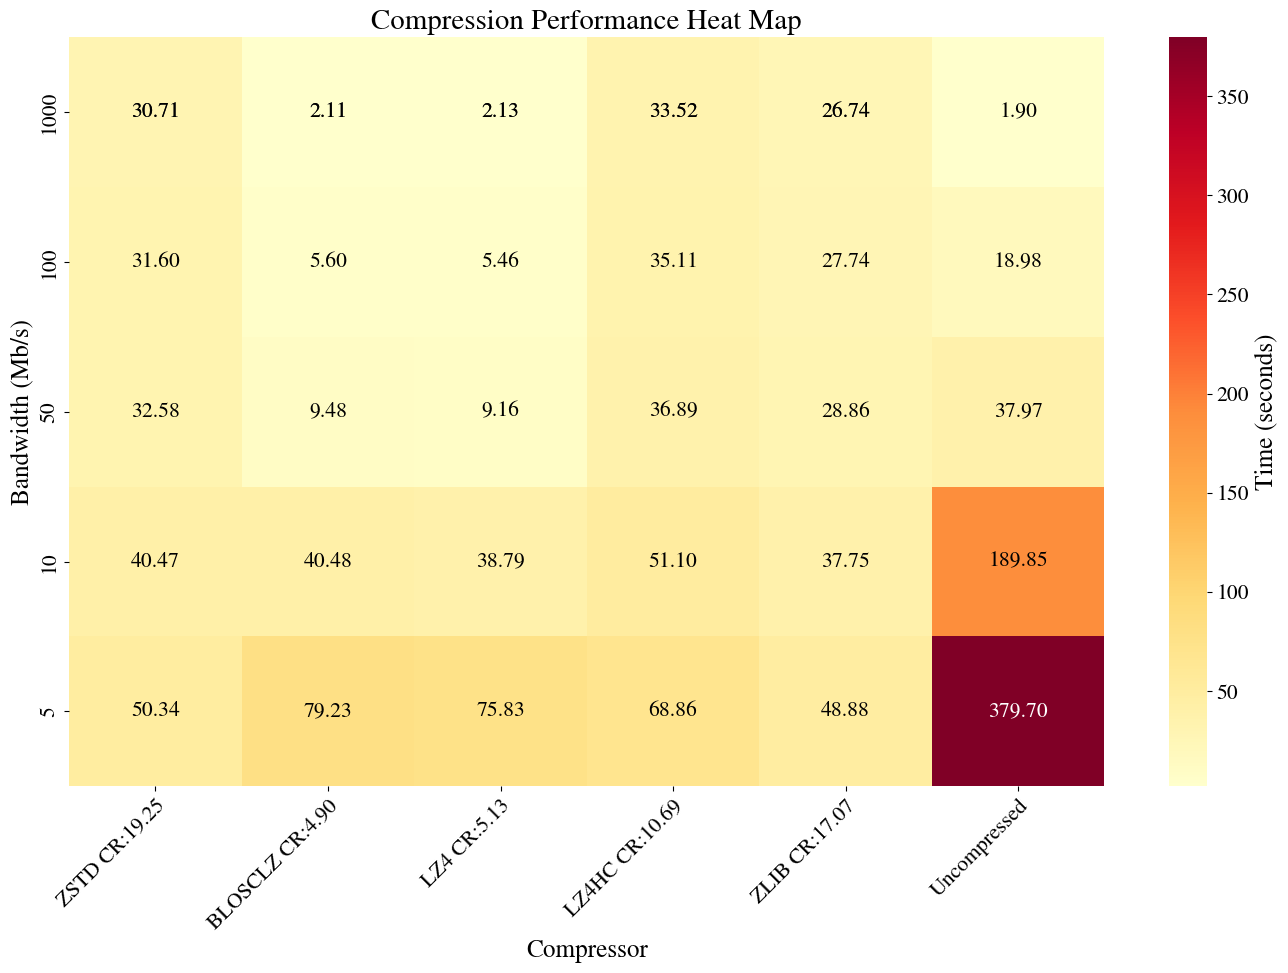

In [177]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

# Increase the font sizes
SMALL_SIZE = 12*1.3
MEDIUM_SIZE = 14*1.3
BIGGER_SIZE = 16*1.3

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)    # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

# Create the heat map
fig, ax = plt.subplots(figsize=(14, 10))  # Increased figure size
sns.heatmap(data, xticklabels=compressor_labels, yticklabels=bandwidths,
            cmap='YlOrRd', fmt='.2f', annot=True, ax=ax, cbar=True, 
            cbar_kws={'label': 'Time (seconds)'}, annot_kws={"size": SMALL_SIZE})

# Function to determine text color based on background
def text_color_for_background(value):
    threshold = (data.max() - data.min()) / 2.0 + data.min()
    return 'white' if value > threshold else 'black'

# Manually add text with conditional coloring
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        value = data[i, j]
        text_color = text_color_for_background(value)
        ax.text(j + 0.5, i + 0.5, f'{value:.2f}',
                ha="center", va="center", color=text_color, fontsize=SMALL_SIZE)

plt.xlabel('Compressor', fontsize=MEDIUM_SIZE)
plt.ylabel('Bandwidth (Mb/s)', fontsize=MEDIUM_SIZE)
plt.title('Compression Performance Heat Map', fontsize=BIGGER_SIZE)

# Rotate and align the tick labels so they look better
plt.setp(ax.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')

# Adjust layout
plt.tight_layout()

# Save the figure as PNG
plt.savefig('compression_heatmap_final_v1.jpg', dpi=500, bbox_inches='tight')

# If you still want to display the plot, keep this line
plt.show()

In [ ]:
'''
Class Background: 408061569 pixels
Class Sedan: 198512576 pixels
Class Pickup: 110858635 pixels
Class Offroad: 186795700 pixels
'''

In [10]:
background = 408061569
sedan = 198512576
pickup = 110858635
offroad = 186795700


print("{:.2e}".format(408061569))
print("{:.2e}".format(198512576))
print("{:.2e}".format(110858635))
print("{:.2e}".format(186795700))

4.08e+08
1.99e+08
1.11e+08
1.87e+08


/local_scratch/slurm.307362/ipykernel_788582/2136608929.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(categories, fontweight='bold', rotation=45)


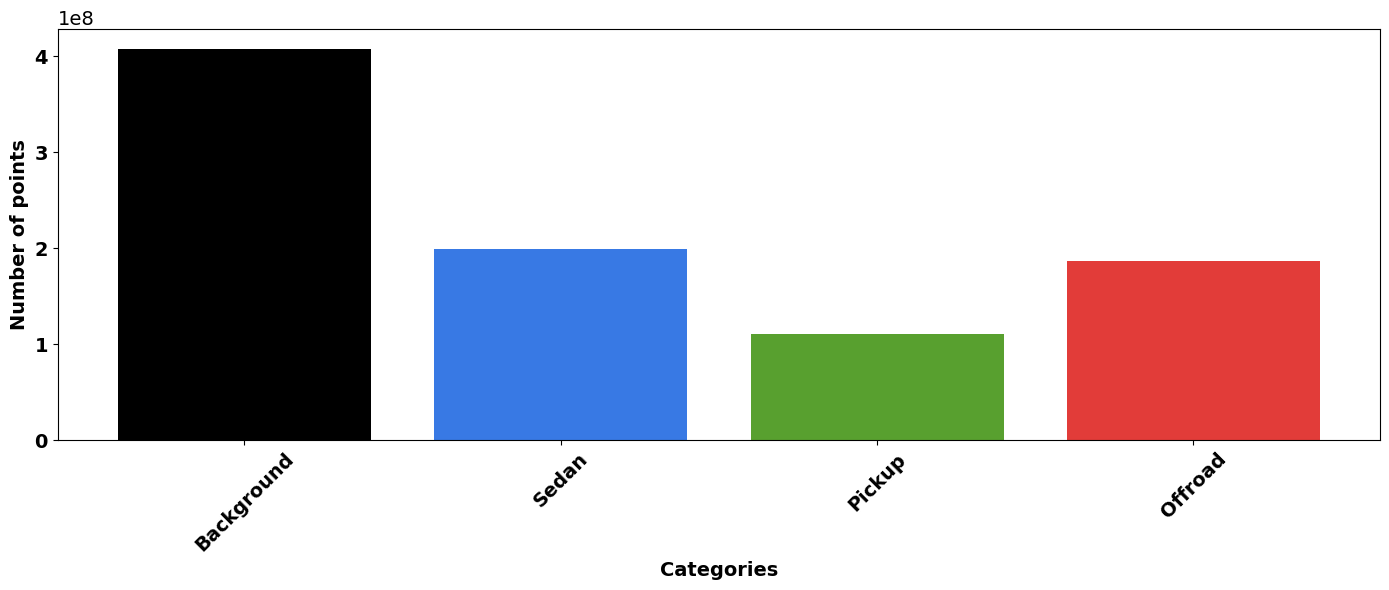

In [89]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import ScalarFormatter, FuncFormatter

# Data from the provided image
categories = ["Background", "Sedan", "Pickup", "Offroad"]
values = [
    4.08e+08,
    1.99e+08,
    1.11e+08,
    1.87e+08,
]

# RGB colors
colors = [
    (0, 0, 0),      # black
    (56/255, 121/255, 228/255),      # blue
    (88/255, 160/255, 47/255),      # green
    (226/255, 60/255, 57/255)       # red
]

# Create figure and axis
fig, ax = plt.subplots(figsize=(14, 6))

# Plot bars
bars = ax.bar(categories, values, color=colors)

# Label the plot
ax.set_xlabel('Categories', fontsize=14, fontweight='bold')
ax.set_ylabel('Number of points', fontsize=14, fontweight='bold')
ax.tick_params(axis='x', labelsize=14, rotation=45)
ax.set_xticklabels(categories, fontweight='bold', rotation=45)

# Set y-axis ticks to 0, 1, 2, 3, 4
ax.set_yticks([0, 1e8, 2e8, 3e8, 4e8])
ax.set_yticklabels(['0', '1', '2', '3', '4'])

# Make y-axis labels bold
for label in ax.get_yticklabels():
    label.set_fontsize(14)
    label.set_fontweight('bold')

# Format y-axis with scalar formatter to show offset
formatter = ScalarFormatter()
#formatter.set_scientific(True)
ax.yaxis.set_major_formatter(formatter)

# Adjust offset text
ax.yaxis.get_offset_text().set_fontsize(14)
#ax.yaxis.get_offset_text().set_fontweight('bold')

# Show plot
plt.tight_layout()

plt.savefig("cavs_class_distribution.png", dpi=500, bbox_inches='tight')

plt.show()
#plt.savefig("cavs_class_distribution.png")